# Information_Based Learning


A real world Titanic dataset has been used to train data. The training set should be used to build machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. The models will be based on “features” like passengers’ gender and class. We may also use feature engineering to create new features. The model predicts whether or not the passengers survived the sinking of the Titanic.

### Data Dictionary

| Variable | Definition | Key |
| ----------- | ----------- | ----------- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Gender | Male, Female |
| Age |	Age in years|  |	
| sibsp	| # of siblings / spouses aboard the Titanic |  |	
| parch |	# of parents / children aboard the Titanic|  |	
| ticket |	Ticket number	|  |
| fare |	Passenger fare |  |	
| cabin |	Cabin number |  |
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations as follows,
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations as follows,
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
# importing packages
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve

In [3]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Comment:

From the above table, we can observe that the features **Age, Cabin, and Embarked** have missing data. 
- **Cabin:** This feature has more than 50% of the data missing. Hence it is ideal to drop this column
- **Embarked:** This feature has 2 missing values which can be neglected.
- **Age:** This feature has approxiamately 20% missing values which needs to be handled.

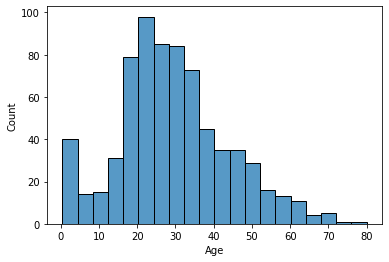

In [5]:
sns.histplot(x='Age', data=df, bins=20);

### Comment: 
We observe that the feature age is slightly right skewed and some outliers. Hence it is optimal to use backfill, forward fill or median to replace the missing values. For this lab, we would use median to replace the missing values.

Reference: https://medium.com/analytics-vidhya/appropriate-ways-to-treat-missing-values-f82f00edd9be

We can also drop columns **Name** and **Ticket** as they provide no information for analysis.

In [6]:
df = df.drop(['Cabin','Name','Ticket'], axis =1)
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df = pd.get_dummies(df)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
df = df.drop(['PassengerId','Sex_female'],axis=1)
df.rename(columns = {'Sex_male':'Sex'},inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


## Decision Tree

/Users/prernamehta/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


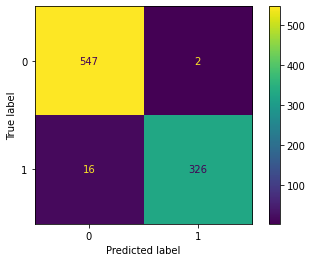

In [20]:
cols = ['Pclass','Sex', 'Age','SibSp','Parch', 'Fare','Embarked_C','Embarked_Q','Embarked_S']
X = df[cols]
y= df['Survived']
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
y_pred = model.predict(X)
plot_confusion_matrix(model, X, y)  
plt.show()

In [21]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       549
           1       0.99      0.95      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.97      0.98       891
weighted avg       0.98      0.98      0.98       891



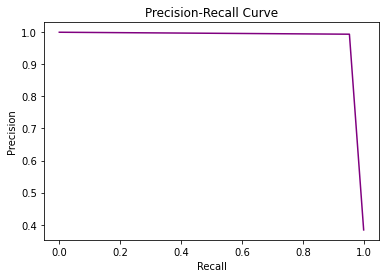

In [22]:
precision, recall, thresholds = precision_recall_curve(y, y_pred)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Feature: 0, Score: 0.10751
Feature: 1, Score: 0.31088
Feature: 2, Score: 0.24868
Feature: 3, Score: 0.04788
Feature: 4, Score: 0.02132
Feature: 5, Score: 0.24734
Feature: 6, Score: 0.00339
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01299


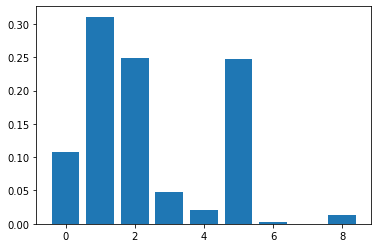

In [23]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

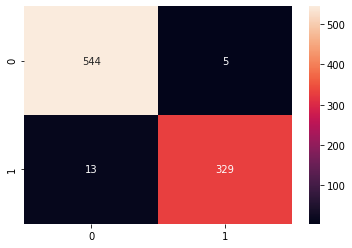

In [24]:
cols = ['Pclass','Sex', 'Age','SibSp','Parch', 'Fare','Embarked_C','Embarked_Q','Embarked_S']
X = df[cols]
y= df['Survived']
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred.round())
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [25]:
print(classification_report(y, y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



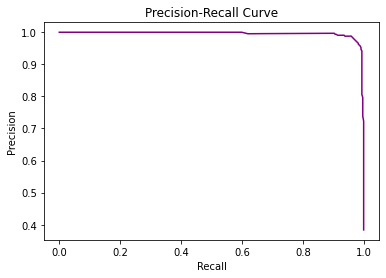

In [26]:
precision, recall, thresholds = precision_recall_curve(y, y_pred)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Feature: 0, Score: 0.10221
Feature: 1, Score: 0.30410
Feature: 2, Score: 0.24481
Feature: 3, Score: 0.04706
Feature: 4, Score: 0.02548
Feature: 5, Score: 0.24395
Feature: 6, Score: 0.01055
Feature: 7, Score: 0.00566
Feature: 8, Score: 0.01618


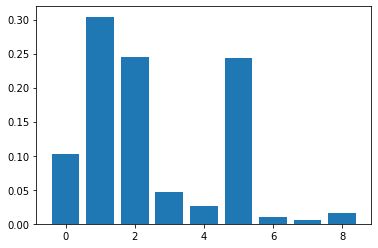

In [27]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 3. AdaBoost 

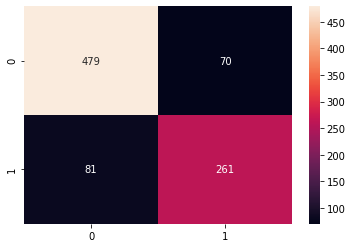

In [28]:
cols = ['Pclass','Sex', 'Age','SibSp','Parch', 'Fare','Embarked_C','Embarked_Q','Embarked_S']
X = df[cols]
y= df['Survived']
# define the model
model = AdaBoostClassifier()
# fit the model
model.fit(X, y)
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred.round())
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [29]:
print(classification_report(y, y_pred.round()))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       549
           1       0.79      0.76      0.78       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



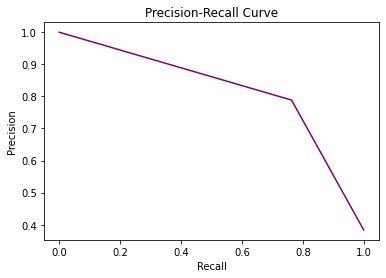

In [30]:
precision, recall, thresholds = precision_recall_curve(y, y_pred)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Feature: 0, Score: 0.08000
Feature: 1, Score: 0.06000
Feature: 2, Score: 0.34000
Feature: 3, Score: 0.08000
Feature: 4, Score: 0.04000
Feature: 5, Score: 0.38000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02000


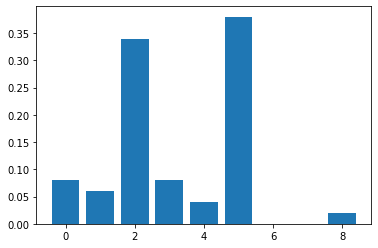

In [31]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 4. Gradient Boosting Classifier

/Users/prernamehta/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


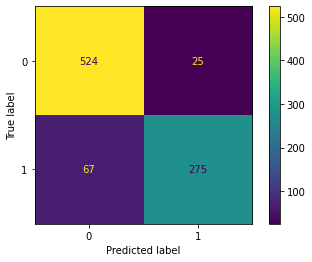

In [32]:
cols = ['Pclass','Sex', 'Age','SibSp','Parch', 'Fare','Embarked_C','Embarked_Q','Embarked_S']
X = df[cols]
y= df['Survived']
# define the model
model = GradientBoostingClassifier()
# fit the model
model.fit(X, y)
y_pred = model.predict(X)
plot_confusion_matrix(model, X, y)  
plt.show()

In [33]:
print(classification_report(y, y_pred.round()))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.92      0.80      0.86       342

    accuracy                           0.90       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.90      0.90      0.90       891



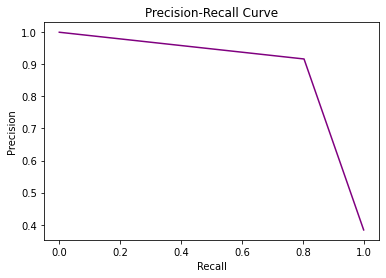

In [34]:
precision, recall, thresholds = precision_recall_curve(y, y_pred)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Feature: 0, Score: 0.14980
Feature: 1, Score: 0.47364
Feature: 2, Score: 0.13228
Feature: 3, Score: 0.05539
Feature: 4, Score: 0.00173
Feature: 5, Score: 0.16566
Feature: 6, Score: 0.00422
Feature: 7, Score: 0.00291
Feature: 8, Score: 0.01438


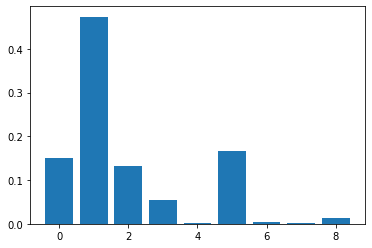

In [35]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Comments:

### Confusion Matrix

The False Positve and False Negative for all models is given as follows,

| Model | FP | FN |
|----------|----------|----------|
|Decision Tree| 16 | 2 |
|Random Forest| 11 | 7 |
|AdaBoost| 81 | 70 |
|Gradient Boosting| 67 | 25 |

Hence, False Postive or Type 1 Error indicates that the model has rejected null hypothesis when its true, for our dataset, the model is rejecting that a person survived. Hence a model with less number of false positive would outperform, in this case ***Random Forest*** has the least number of False Positives  where as AdaBoost has the highest number which needs to be investigated.

### Classification Model

Next, we look into the Classification Reports of all the models and is given as following,

| Model | Precision | Recall | F-Score | Accuracy |
|----------|----------|----------|----------|----------|
|Decision Tree| 0.98 | 0.98 | 0.98 | 0.98 |
|Random Forest| 0.98 | 0.98 | 0.98 | 0.98 |
|AdaBoost| 0.83 | 0.82 | 0.82 | 0.83 |
|Gradient Boosting| 0.91 | 0.88 | 0.89 | 0.90 |

The models, ***Random Forest*** and ***Decision Trees*** outperforms with precision, Recall, F-score and Accuracy being 0.98 implying that both models is making accurate predictions. However, the sample for class ***'1'*** and ***'0'*** is 342 and 549 respectively implying that the dataset is imbalanced and needs some sampling techniques to improve the model's performance. 

### Feature Importance

Lastly, We look into the highest and lowest feature importance for respective model, that is given as following,

| Model | Significant Feature | Not Significant Feature |
|----------|----------|----------|
|Decision Tree| Sex | Embarked_C |
|Random Forest| Sex | Embarked_Q |
|AdaBoost| Fare | Embarked_C, Embarked_Q |
|Gradient Boosting| Sex | Parch |

We observed that for most of the models, the feature ***Sex*** has significant influence on the model which can be investigated into for further analysis, awhere has the features with lowest significant has least impact on the model and can be eradicated to simplify results and analysis.

### Precision - Recall Curve

Since the dataset is imbalanced, we computed Precision-Recall curve to analysis the model further. We observe that for the models Decision tree and Random Forest, as Recall oncrease the Precision also increases but for the other two models, that is AdaBoost and Gradient Boost there is sharp fall in Precision when recall is at 0.8. 